# 01 Import libraries

In [1]:
import numpy as np
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Using device: cpu


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import pandas as pd

In [4]:
import importlib

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
import lib
importlib.reload(lib)

<module 'lib' from 'c:\\Users\\dongq\\OneDrive\\Desktop\\New results\\Portfolio Allocation\\Learning-the-Optimal-Solution-Path\\lib\\__init__.py'>

In [7]:
from lib.fast_tensor_data_loader import FastTensorDataLoader
from lib.lsp.basis_generator import bivariate_legendre, bivariate_chebyshev
from lib.lsp.basis_tf_module import Basis_TF_SGD
from lib.lsp.solver_lsp import train_lsp, test_lsp
from lib.lsp.loss_fn_lsp import allocation_cost

# 02 Instantiate dataset

In [73]:
# file path for Colab. May need to change this
# X_df = pd.read_csv('/content/Learning-the-Optimal-Solution-Path/experiments/fair-regression/data/X_processed.csv')
# y_df = pd.read_csv('/content/Learning-the-Optimal-Solution-Path/experiments/fair-regression/data/y_processed.csv')
decomp_cov_df = pd.read_csv('decomp_pert_10_cov.csv')
mean_df = pd.read_csv('mean.csv')

In [74]:
decomp_cov = np.array(decomp_cov_df)
mean = np.array(mean_df).squeeze()

In [75]:
decomp_cov = torch.tensor(decomp_cov, dtype=torch.float32)
mean = torch.tensor(mean, dtype=torch.float32)

In [76]:
# full gradient descent uses all data points
GD_data_loader = FastTensorDataLoader(decomp_cov, mean, batch_size=len(decomp_cov), shuffle=False, )
# test data
test_data_loader = FastTensorDataLoader(decomp_cov, mean, batch_size=len(decomp_cov), shuffle=False, )

In [36]:
lam_max_2d = [1, 1]
lam_min_2d = [.2, 0]
input_dim = decomp_cov.shape[1] - 1

# 03 Define Functions

In [63]:
loss_fn = allocation_cost

In [64]:
def gen_loss_gd(hyper_params, lr):
    model = Basis_TF_SGD(input_dim, basis_dim, phi_lam, intercept=False).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    optimizer.zero_grad()
    weight = model.linear.weight.clone().detach()
    itr = 0
    for t in range(epochs):
        grad, weight, itr = train_lsp(itr, weight, GD_data_loader, model, loss_fn,
                                      optimizer, lam_min_2d, lam_max_2d, 
                                      weighted_avg=True, step_size=None,
                                      const=None, distribution='uniform', device='cpu')

    loss = test_lsp(test_data_loader, model, loss_fn, hyper_params, device)
    return loss

# 04 Tuning the learning rate for our model

In [39]:
lr_list = 0.5 ** np.arange(5, 15)

In [40]:
hyper_params = [0.3, 0.5]

Legendre polynomials

In [52]:
phi_lam = bivariate_legendre
# phi_lam = bivariate_chebyshev

In [21]:
bivariate_chebyshev([1, 1], 9)

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [22]:
bivariate_legendre([1, 1], 9)

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [42]:
epochs = 50

## Basis dimension = 5

In [55]:
basis_dim = 2

### Exact Gradient:

pick lr = .5**7

In [77]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.03125	 loss: nan
learning rate: 0.015625	 loss: nan
learning rate: 0.0078125	 loss: 1159392133120.0
learning rate: 0.00390625	 loss: 4.034710884094238
learning rate: 0.001953125	 loss: 4.037581920623779
learning rate: 0.0009765625	 loss: 4.051873207092285
learning rate: 0.00048828125	 loss: 4.218480587005615
learning rate: 0.000244140625	 loss: 4.5429205894470215
learning rate: 0.0001220703125	 loss: 5.1873297691345215
learning rate: 6.103515625e-05	 loss: 6.0317182540893555


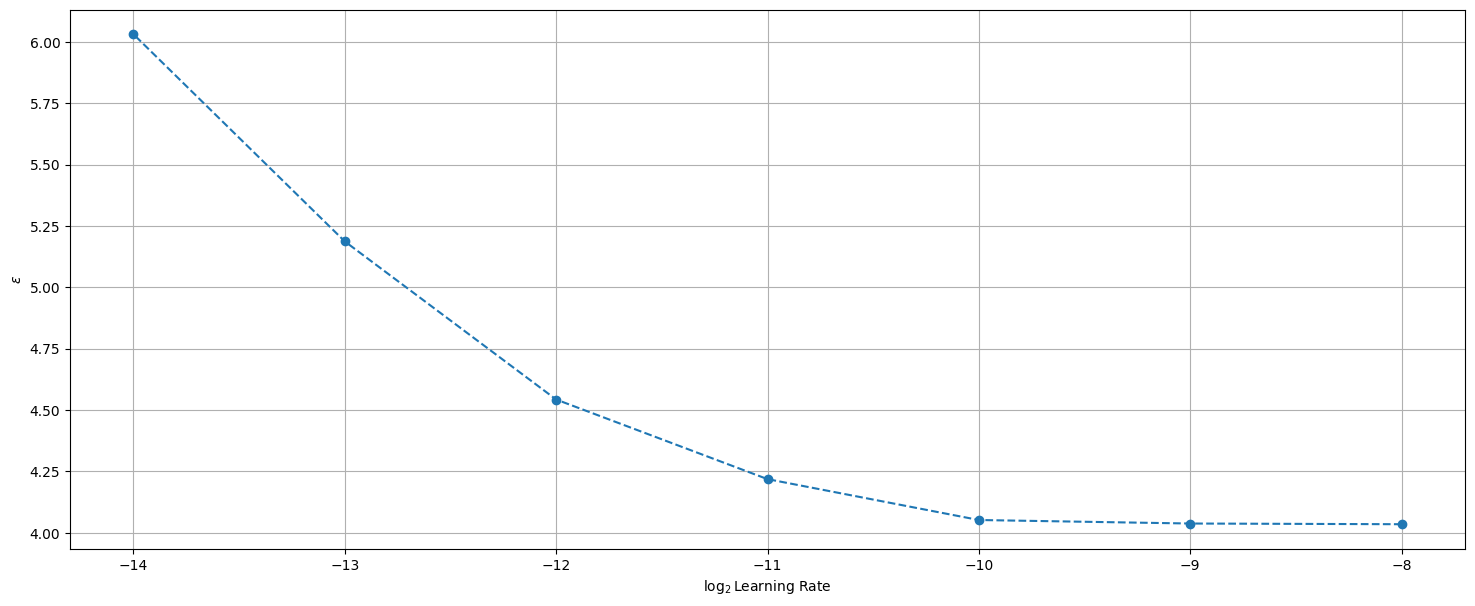

In [78]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[3:]), losses[3:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

## Basis dimension = 7

In [126]:
basis_dim = 7

### Exact Gradient:

pick lr = .5**8

In [127]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.03125	 loss: nan
learning rate: 0.015625	 loss: 4065525248.0
learning rate: 0.0078125	 loss: 2.965080976486206
learning rate: 0.00390625	 loss: 3.007359027862549
learning rate: 0.001953125	 loss: 3.0874979496002197
learning rate: 0.0009765625	 loss: 3.2438766956329346
learning rate: 0.00048828125	 loss: 3.4744410514831543
learning rate: 0.000244140625	 loss: 3.72222900390625
learning rate: 0.0001220703125	 loss: 3.9132113456726074
learning rate: 6.103515625e-05	 loss: 4.040143013000488


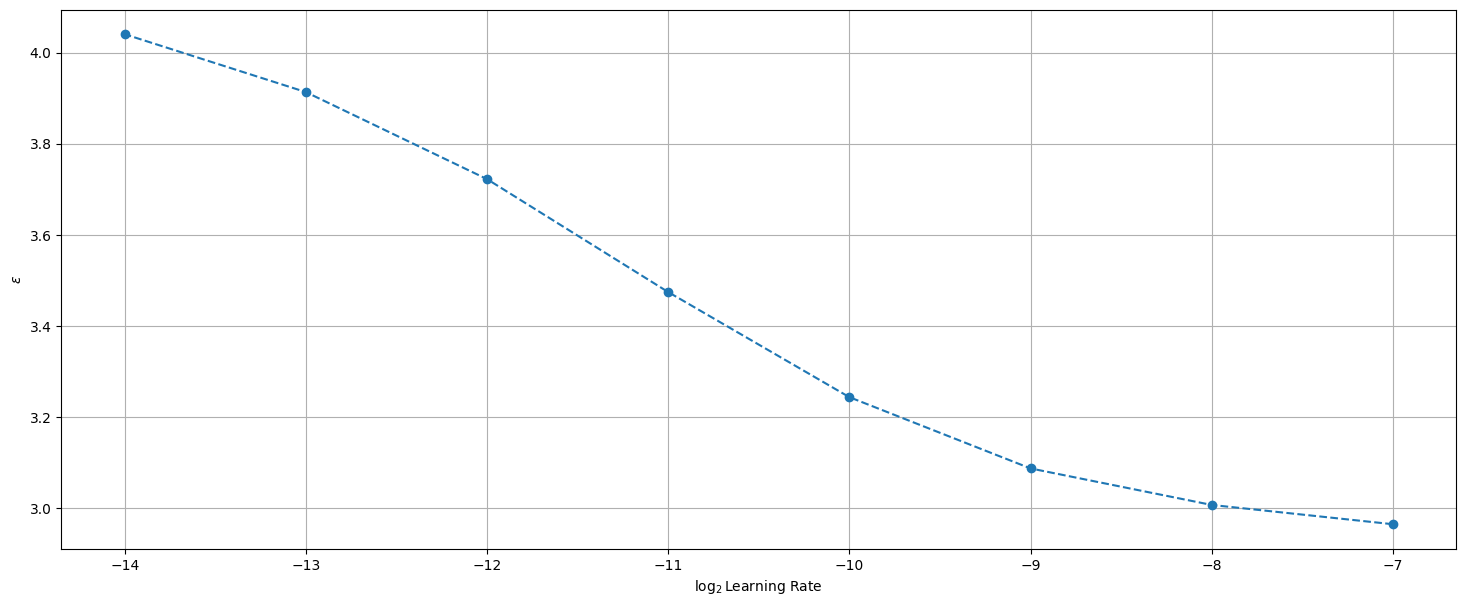

In [128]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[2:]), losses[2:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

## Basis dimension = 9

In [129]:
basis_dim = 9

### Exact Gradient:

pick lr = .5**8

In [130]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.03125	 loss: nan
learning rate: 0.015625	 loss: 36704.66015625
learning rate: 0.0078125	 loss: 2.9606382846832275
learning rate: 0.00390625	 loss: 3.0046474933624268
learning rate: 0.001953125	 loss: 3.0965676307678223
learning rate: 0.0009765625	 loss: 3.2441697120666504
learning rate: 0.00048828125	 loss: 3.481651782989502
learning rate: 0.000244140625	 loss: 3.745035171508789
learning rate: 0.0001220703125	 loss: 3.900892972946167
learning rate: 6.103515625e-05	 loss: 4.031932830810547


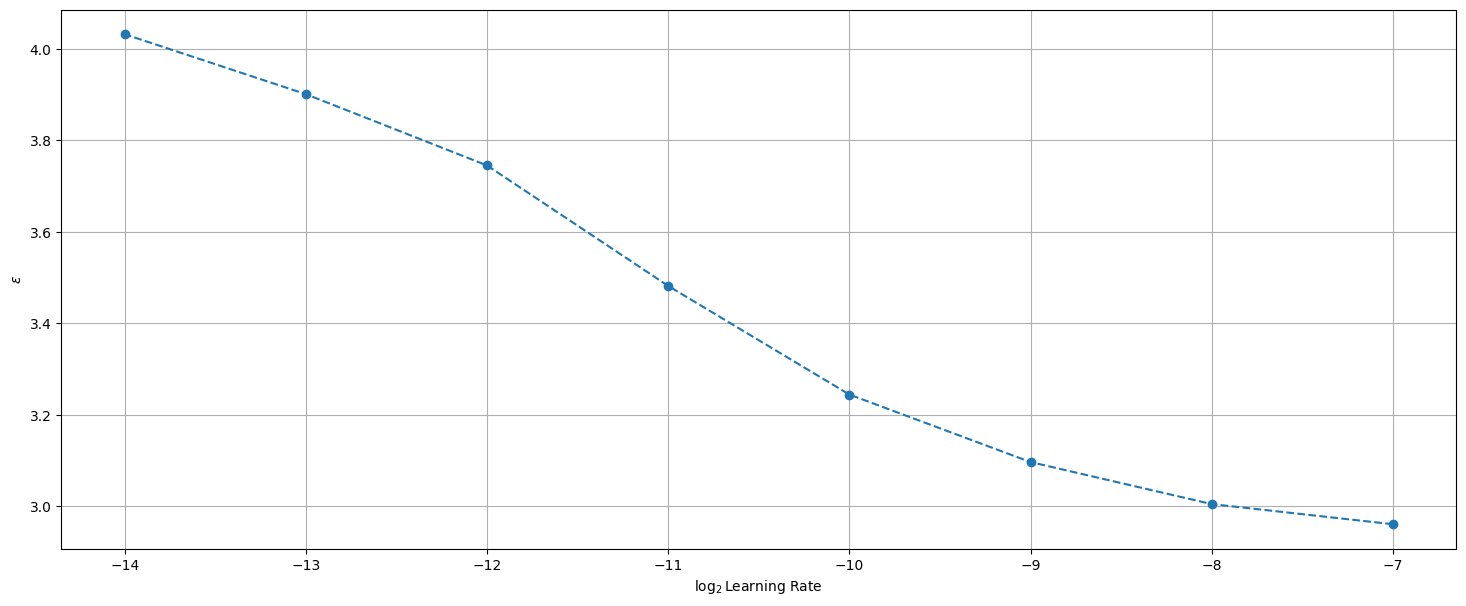

In [131]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[2:]), losses[2:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

In [22]:
# Read the CSV file into a DataFrame
thetastar = pd.read_csv('thetastar_cov_1_20_20.csv')

# Display the DataFrame
thetastar

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.000000,-0.051695,-0.372498,-0.030605,0.071261,0.064125,0.115872,0.331202,0.324274,0.093078
1,1.0,0.947368,-0.051431,-0.371728,-0.030637,0.069471,0.065618,0.115650,0.331527,0.324254,0.091895
2,1.0,0.894737,-0.051167,-0.370957,-0.030668,0.067680,0.067111,0.115428,0.331852,0.324234,0.090711
3,1.0,0.842105,-0.050902,-0.370186,-0.030700,0.065889,0.068604,0.115205,0.332177,0.324213,0.089528
4,1.0,0.789474,-0.050638,-0.369415,-0.030732,0.064099,0.070098,0.114983,0.332502,0.324193,0.088345
...,...,...,...,...,...,...,...,...,...,...,...
395,0.2,0.210526,-0.057047,-0.193889,-0.033664,0.068384,0.084006,0.122533,0.292953,0.317586,0.034809
396,0.2,0.157895,-0.056191,-0.192155,-0.033753,0.061332,0.089898,0.121131,0.294123,0.317807,0.031478
397,0.2,0.105263,-0.055334,-0.190423,-0.033842,0.054281,0.095791,0.119727,0.295293,0.318028,0.028146
398,0.2,0.052632,-0.054477,-0.188693,-0.033931,0.047232,0.101685,0.118323,0.296463,0.318248,0.024814


In [23]:
thetastar = thetastar.to_numpy()

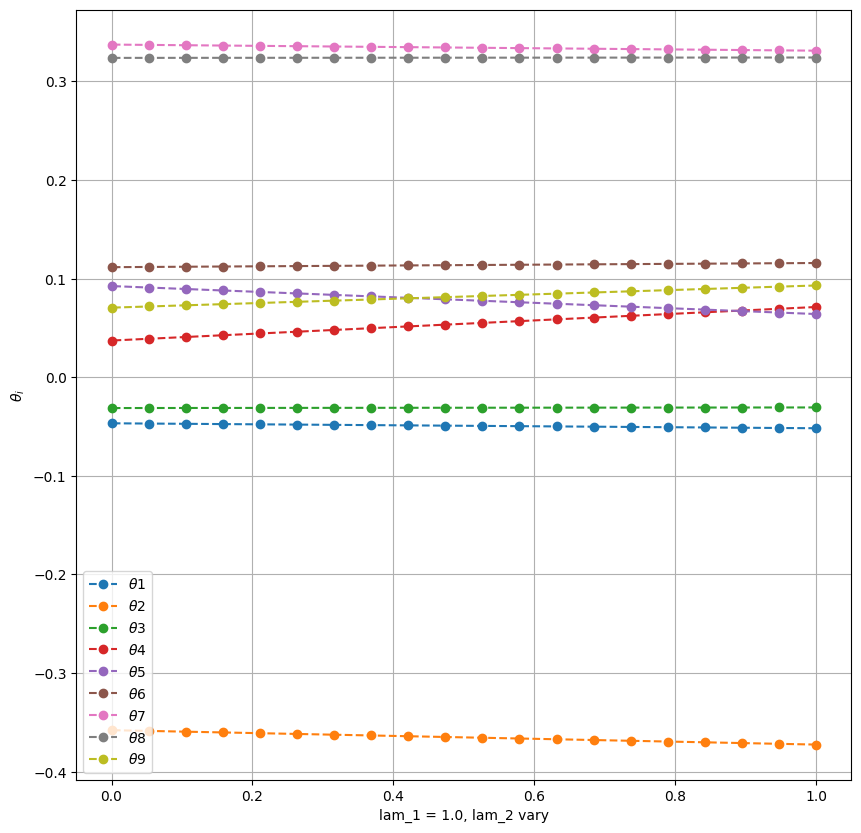

In [27]:
# plot result of our method:
plt.figure(figsize=(10,10))
start = 0
for i in range(2, len(thetastar[0])):
    plt.plot(thetastar[start:start+20, 1], thetastar[start:start+20, i], '--o', label=f'$\\theta${i-1}')
# i=5
# plt.plot(thetastar[start:start+10, 1], thetastar[start:start+10, i], '--o', label=f'lam_1 = {thetastar[start, 0]}, $\\theta${i+1}')
plt.xlabel(f'lam_1 = {thetastar[start, 0]}, lam_2 vary')
plt.ylabel(f"$\\theta_i$")
plt.legend()
plt.grid(True)

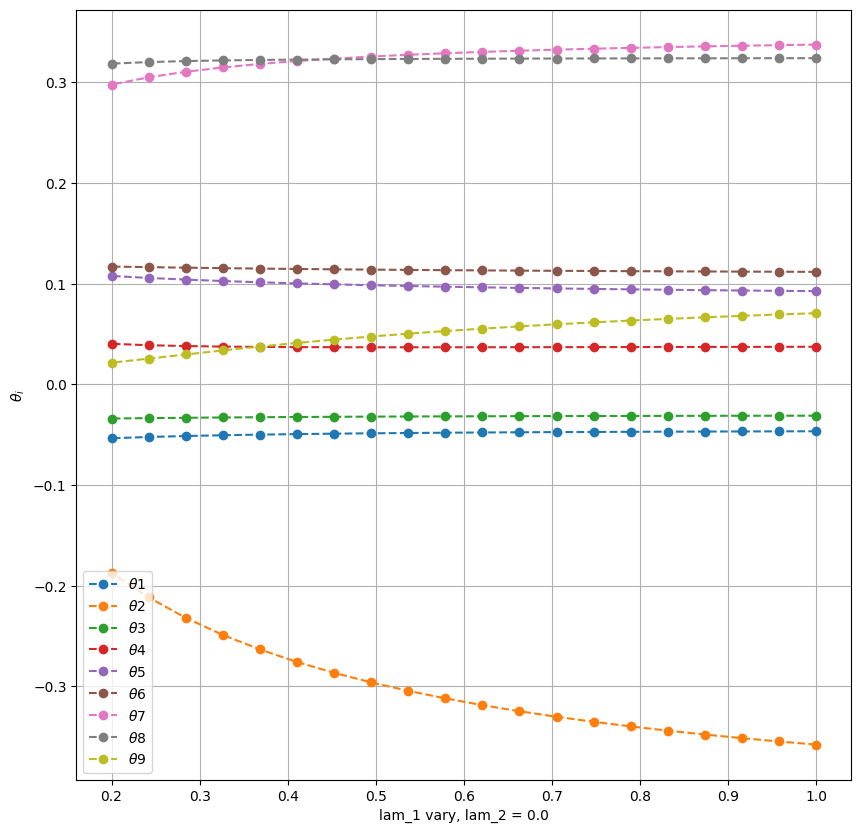

In [30]:
# plot result of our method:
plt.figure(figsize=(10,10))
start = 19
indices = np.arange(start, 400+start, 20)
for i in range(2, len(thetastar[0])):
    plt.plot(thetastar[indices, 0], thetastar[indices, i], '--o', label=f'$\\theta${i-1}')
# i=5
# plt.plot(thetastar[start:start+10, 1], thetastar[start:start+10, i], '--o', label=f'lam_1 = {thetastar[start, 0]}, $\\theta${i+1}')
plt.xlabel(f'lam_1 vary, lam_2 = {thetastar[start, 1]}')
plt.ylabel(f"$\\theta_i$")
plt.legend()
plt.grid(True)